##### STAT 207 Lab 4: Distributions and random variables

Due: Wednesday, February 19, 23:59:59

This lab consists of 3 main parts. You may add as many cells as you need in order to do the excercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". In some cases, you will need to import certain python libraries before doing calculations.

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

**Note: not every problem in this lab requires Python calculation. In some cases you can just work it out and type in your solution.**




### Part 1: Bernoulli random variables (8 pts)

**a) (2 pts) A Bernoulli random variable can only take two possible values: 0 or 1. Suppose $X$ is a Bernoulli random variable and $P(X=1)=0.2$. What does $P(X=0)$ equal? (answer only).**

In [11]:
0.8

0.8

**b) (2 pts) The population mean $\mu$ of a discrete random variable $X$ with possible values $x_1, x_2, \ldots$ is given by**

$$
\mu = E[X] = x_1 P(X=x_1) + x_2 P(X=x_2) + \ldots 
$$

**where the sum ranges over all possible values $x_i$ for $X$. If $X$ is a Bernoulli random variable with $P(X=1)= 0.6$, find  $E[X]$ by hand (i.e. not using Python functions). Show how you calculated it.**


In [12]:
u=.6*1 + .4*0
u

0.6

**c) (2 pts) The variance of a random variable with mean $\mu$ is given by**

$$
\sigma^2 = Var(X) = E[(X-\mu)^2]
$$

**If $X$ is a Bernoulli random variable and $P(X=1)=0.6$, compute the variance by hand. (show work)**

In [13]:
var = 0.6*(0.6 - 1)**2 + 0.4*(0.6-0)**2
var

0.24

**d) (2 pts) For any Bernoulli random variable $X$ with $P(X=1) = p = 1- P(X=0)$, where $0 <p<1$, show that the population mean and variance for $X$ are given by $\mu=p$ and $\sigma^2 = p(1-p)$. I.e. go through the motions of how you calculate $\mu$ and $\sigma^2$ with $p$ inserted instead of a specific number. Then try to simplify the expressions into the given forms, showing how.**

In [14]:
'''
var = p * (p - 1)^2 + (1 - p)*(p - 0)^2
var = p * (p^2 - 2p + 1) + p^2 - p^3
var = p^3 - 2p^2 + p + p^2 - p^3
var = p - p^2
var = p(1-p)
'''

'\nvar = p * (p - 1)^2 + (1 - p)*(p - 0)^2\nvar = p * (p^2 - 2p + 1) + p^2 - p^3\nvar = p^3 - 2p^2 + p + p^2 - p^3\nvar = p - p^2\nvar = p(1-p)\n'

### Part 2: Normal Distribution (8 pts)

The normal family of distributions are used widely in practice, both because of the Central Limit Theorem for the large sample distribution of averages, and because many types of measurements appear to follow a normal distribution to a reasonable approximation. The SciPy.stats library provides the 'norm' function with methods for computing the probability density function (.pdf), cumulative distribution function (.cdf), percent point function (.ppf - like the quantile function for data), random variate generation (.rvs), and other parameters (.mean, .std, .median etc). Please study the documentation here:
[scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

Let's let 'norm' help us experiment with the normal distribution. Note that for the 'norm' function the loc keyword specifies the mean, and the scale keyword specifies the standard deviation.

In [15]:
from scipy.stats import norm

**a) (2 pts) Use the scipy.stats .mean( ) and .std( ) methods to show that distribution implemented by the 'norm' function with loc=8 and scale=2 has mean 8 and standard devation 2.**

In [16]:
print(norm.mean(loc = 8, scale = 2))
norm.std(loc = 8, scale = 2)

8.0


2.0

**b) (2 pts) Suppose the random variable $X$ is normally distributed with mean 5 and standard deviation 1. Compute $P(X \le 7)$.**

In [51]:
norm.cdf(7, loc = 5, scale = 1)

0.9772498680518208

**c) (2 pts) If $X$ normally distributed with mean 5 and standard deviation 1, compute $P(3 \lt X \le 7)$**

In [18]:
norm.cdf(7, loc = 5, scale = 1) - norm.cdf(3, loc = 5, scale = 1)

0.9544997361036416

**e) (2 pts) If $X$ is normal with mean 5 and standard deviation 1, compute the 25th percentile of its distribution.**

In [19]:
norm.ppf(.25, loc = 5)

4.325510249803918

### Part 3: Sampling from the Normal distribution (9 pts)

If $X_1, X_2, \ldots, X_n$ is an independent random sample from a distribution with mean $\mu$ and standard deviation $\sigma$, then the sample mean

$$
\bar{X} = {X_1+X_2+\cdots+X_n\over n}
$$

has the same mean as the original variable, i.e. $E[\bar{X}]=\mu$, but it has reduced standard devation, according to the square root rule:

$$
SD[\bar{X}] = {\sigma\over \sqrt{n}}.
$$

Furthermore, averages of normal random variables are also normally distributed.

**a) (2 pts) Use 'norm' .rvs( ) method to generate a random sample of 25 observations from the normal distribution with mean = 10 and standard devation =2. Save the values in a pandas Series or data frame and display the results.**

In [28]:
df = norm.rvs(loc = 10, scale = 2, size = 25)
df

array([ 8.98479157, 14.39236087,  7.10435464,  8.81488126,  9.3567294 ,
        9.08791398,  6.93526228, 11.27238133, 11.11981323, 11.99352094,
        9.46788154,  9.86163741, 10.1294468 , 11.53197794,  4.76385642,
       10.80421423, 10.09134359,  9.26157977,  9.40043919, 11.17306462,
       10.46031146, 11.71204421, 13.50392626, 15.6108991 , 12.95146209])

**b) (1 pt) Compute the sample mean and sample standard deviation for the numbers you generated in part a). Are they close to 10 and 2 respectively?**

In [32]:
print(df.mean())
df.std()


8.816877173404503


6.5223607439605225

**c) (1 pts) Make a density histogram of the values you got in a)** 

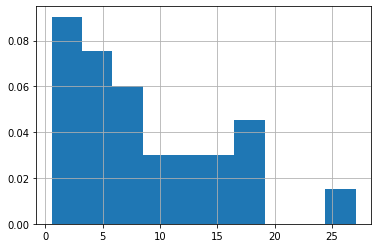

In [33]:
import pandas as pd
df = pd.Series(sample)
df.hist(density = True)

**d) (3 pts) Write a loop to repeat the following process 50 times:  1) Draw a sample of 25 observations from the normal distribution with mean=10 and standard devation =2. 2) Compute the sample mean for each sample. Store your 50 sample means in a data frame or Series and display them.**

In [37]:
data = []
for i in range(50):
    mean = norm.rvs(loc = 10, scale = 2, size = 25).mean()
    data.append({"mean":mean})
df1 = pd.DataFrame(data)    
df1

,mean
0,9.847792
1,9.673552
2,9.976683
3,10.693287
4,9.864510
5,9.563379
6,10.623294
7,9.956507
8,9.680333
9,10.256708


**e) (1 pt) Compute and display the sample mean and standard deviation of the 50 sample means you got in d).** 

In [45]:
print(df1['mean'].mean())
df1['mean'].std()

10.014150721819815


0.34573479036375837

**f) (1 pt) using the square root law above, what are the population mean and population standard deviation for the sample mean of 25 observations from a normal distribution with mean=10 and standard deviation = 2?**

In [52]:
'sd = Ex / sqrt(n)'
popMean = 10
popStd = 2 / (25**0.5)
print(popMean)
print(popStd)

10
0.4
